among all the trained models on different datasets and different hyperparameters it seems that the best logistic regression model achieved 74.43% accuracy on the random oversampling test data. 

best logistic regression model hyperparameters: 
- C = 5
- SOLVER = saga
- PENALTY = l2
- MAX_ITER = 100


## import libraries

In [36]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import RocCurveDisplay 

import warnings
warnings.filterwarnings("ignore")

## import dataset

In [2]:
# load random oversampling data
X_ros_train = pd.read_csv('data/ros/X_ros_train.csv')
X_ros_test = pd.read_csv('data/ros/X_ros_test.csv')

y_ros_train = pd.read_csv('data/ros/y_ros_train.csv')
y_ros_test = pd.read_csv('data/ros/y_ros_test.csv')

## train the logisti regression model

In [3]:
# re-train the best logistic regression model 
# to evaluate it's performance
C = 5
SOLVER = 'saga'
PENALTY = 'l2'
MAX_ITER = 100

model_log_reg = LogisticRegression(
    multi_class='ovr', C=C, solver=SOLVER, penalty=PENALTY, max_iter=MAX_ITER, random_state=7
)

In [4]:
history = model_log_reg.fit(X_ros_train, y_ros_train)

## evaluate model's performance

In [10]:
display(history)
display(history.get_params())

LogisticRegression(C=5, multi_class='ovr', random_state=7, solver='saga')

{'C': 5,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'ovr',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 7,
 'solver': 'saga',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [5]:
# predict the test set
y_pred = model_log_reg.predict(X_ros_test)
# calculate model's accuracy
accuray = accuracy_score(y_true=y_ros_test, y_pred=y_pred)

In [11]:
print(f'model {accuray = }')

model accuray = 0.7443496435869039


<AxesSubplot: >

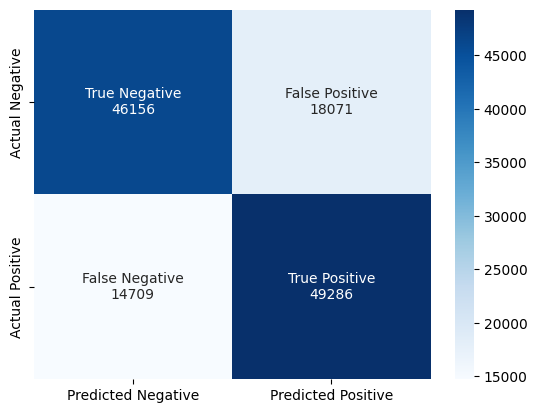

In [29]:
cf_matrix = confusion_matrix(y_true=y_ros_test, y_pred=y_pred)

# preparing the labels
labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
values = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten() ]
annotations = [f'{v1}\n{v2}' for v1, v2 in zip(labels, values)]
annotations = np.asarray(annotations).reshape(2, 2)
axxlabels = ['Predicted Negative', 'Predicted Positive']
axylabels = ['Actual Negative', 'Actual Positive']


# plotting the confusion matrix
sns.heatmap(cf_matrix, annot=annotations, 
            fmt='', xticklabels=axxlabels, yticklabels=axylabels, 
            cmap=sns.color_palette('Blues', as_cmap=True))

In [34]:
# calculate accuracy, sensitivity & specifity
tn = cf_matrix.flatten()[0] # true negative
fp = cf_matrix.flatten()[1] # false positive
fn = cf_matrix.flatten()[2] # false negative
tp = cf_matrix.flatten()[3] # true positive

accuracy_score = (tp + tn) / (tn + fp + fn + tp) * 100
tpr = (tp / (tp + fn)) * 100
tnr = (tn / (tn + fp)) * 100

print(f'accuracy score is {accuracy_score}')
print(f'true positive rate is {tpr}')
print(f'true negative rate is {tnr}')

accuracy score is 74.4349643586904
true positive rate is 77.01539182748652
true negative rate is 71.86385787908513


considering diabtetes is a medical situation the logistice regression model performs on average with 
- accuracy score of 74.43%
- true positive rate of 77.01% 
- true negative rate of 71.86%

this implies that the model can predict better with the score of 77% if the patient has diabetes and the model predicts he/she has. the model predicts negative if the patient does not have diabetes with score of 71.8%. 

overal the accuracy of the model is 74.4% which is not excellent considering medical situation. 

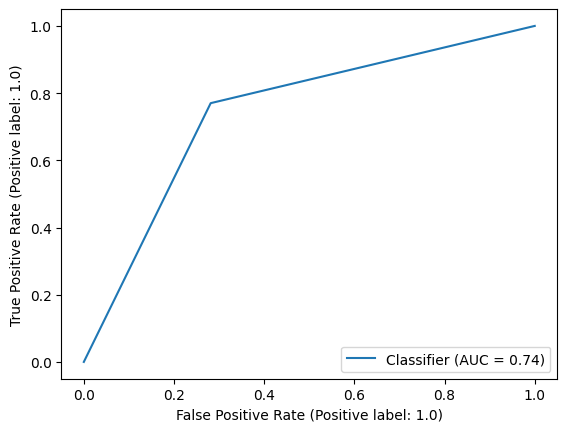

In [39]:
RocCurveDisplay.from_predictions(y_true=y_ros_test, y_pred=y_pred, pos_label=1.0)

As we can see, the ROC curve is in above the 45 degree line and the edge, and the Area Under the Curve is 0.74. This means that the probability of a positive instance ranking higher than a negative instance is 0.74, and hence the model performs moderately.